# Assignment 1 

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc

### Load dataset

In [2]:
df = pd.read_csv("data/weather.csv")
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Inspect dataset

In [3]:
df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,1.999567e+07,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,1.212176e+05,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,1.979010e+07,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [5]:
df.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

df['date'] = df['date'].dt.strftime('%m')

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%m').dt.month_name().str.slice(stop=3)



In [8]:
df['cloud_cover'] = df['cloud_cover'].fillna(df['cloud_cover'].mean())
df['global_radiation'] = df['global_radiation'].fillna(df['global_radiation'].mean())
df['max_temp'] = df['max_temp'].fillna(df['max_temp'].mean())
df['mean_temp'] = df['mean_temp'].fillna(df['mean_temp'].mean())
df['min_temp'] = df['min_temp'].fillna(df['min_temp'].mean())
df['precipitation'] = df['precipitation'].fillna(df['precipitation'].mean())
df['pressure'] = df['pressure'].fillna(df['pressure'].mean())
df['snow_depth'] = df['snow_depth'].fillna(df['snow_depth'].mean())

In [9]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,Jan,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,Jan,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,Jan,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,Jan,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,Jan,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


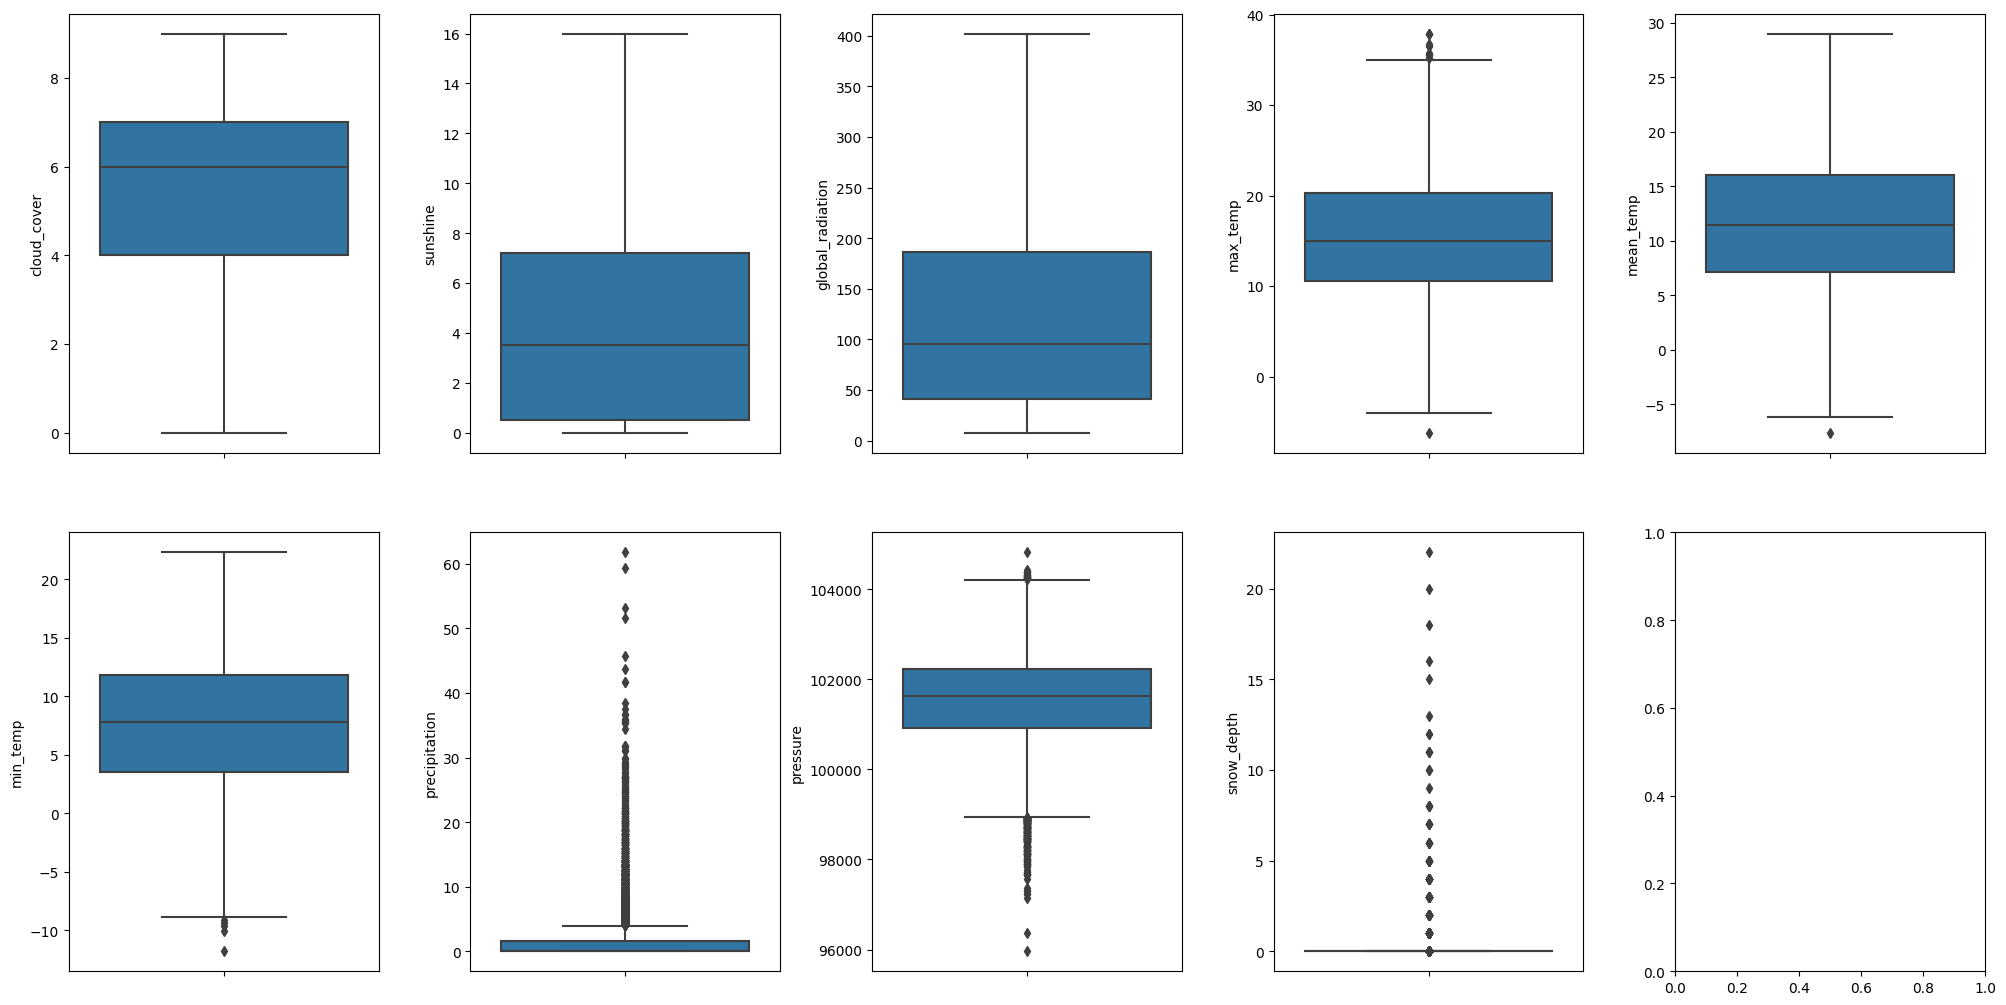

In [75]:
# create box plots
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != "date":
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
    
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

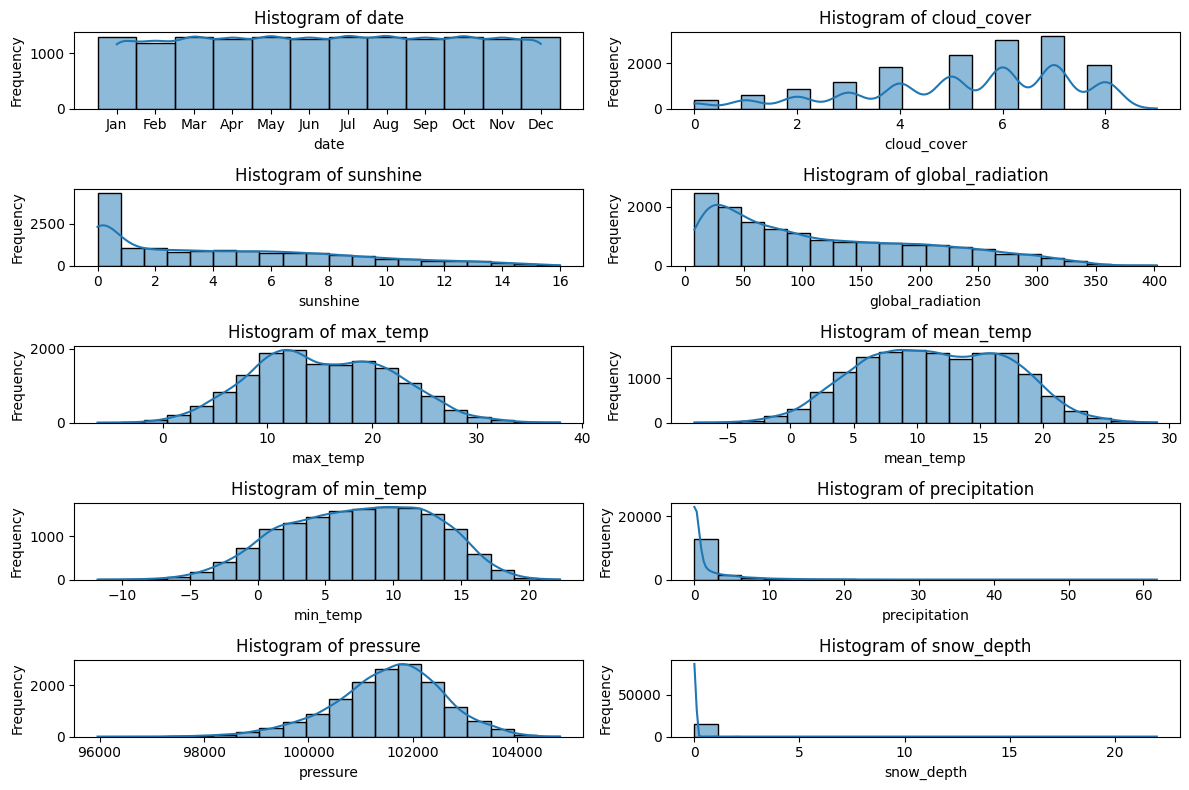

In [11]:
plt.figure(figsize=(12, 8))

num_columns = 2  # Number of columns per row
num_rows = -(-len(df.columns) // num_columns)  # Calculate the number of rows needed

for i, column in enumerate(df.columns):

    
    plt.subplot(num_rows, num_columns, i+1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
 

In [12]:
df_post = pd.get_dummies(df)
df_post.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,date_Apr,...,date_Dec,date_Feb,date_Jan,date_Jul,date_Jun,date_Mar,date_May,date_Nov,date_Oct,date_Sep
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,False,...,False,False,True,False,False,False,False,False,False,False
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,False,...,False,False,True,False,False,False,False,False,False,False
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,False,...,False,False,True,False,False,False,False,False,False,False
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,False,...,False,False,True,False,False,False,False,False,False,False
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,False,...,False,False,True,False,False,False,False,False,False,False


## Question 1 - Linear Regression

### Intial data split


In [13]:
lm_train, lm_test = train_test_split(df_post, test_size=0.3, random_state=10)

### Check Corelation

In [14]:
c = lm_train.corr()
c

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,date_Apr,...,date_Dec,date_Feb,date_Jan,date_Jul,date_Jun,date_Mar,date_May,date_Nov,date_Oct,date_Sep
cloud_cover,1.000000,-0.737522,-0.485403,-0.207344,-0.105360,0.053601,0.237919,-0.239110,-0.002362,-0.041515,...,0.055072,0.044651,0.058171,-0.046111,-0.006426,0.037714,-0.036270,0.032797,0.011416,-0.047993
sunshine,-0.737522,1.000000,0.852396,0.472680,0.394500,0.218012,-0.242767,0.225948,-0.032500,0.093498,...,-0.202855,-0.114039,-0.187123,0.173866,0.152633,-0.047737,0.156118,-0.156136,-0.062478,0.045149
global_radiation,-0.485403,0.852396,1.000000,0.689031,0.631758,0.475835,-0.173045,0.152338,-0.057980,0.153635,...,-0.325503,-0.208536,-0.305765,0.322176,0.310328,-0.060150,0.293088,-0.273574,-0.157631,0.021745
max_temp,-0.207344,0.472680,0.689031,1.000000,0.911041,0.809460,-0.079643,0.096894,-0.123123,-0.032357,...,-0.301921,-0.297294,-0.341294,0.386877,0.262224,-0.185471,0.130097,-0.199424,0.010292,0.207783
mean_temp,-0.105360,0.394500,0.631758,0.911041,1.000000,0.954522,-0.017161,0.004154,-0.148588,-0.073113,...,-0.287919,-0.303581,-0.336193,0.389105,0.261115,-0.204156,0.104868,-0.179616,0.034802,0.221721
min_temp,0.053601,0.218012,0.475835,0.809460,0.954522,1.000000,0.031122,-0.074382,-0.153254,-0.108385,...,-0.248167,-0.284743,-0.307162,0.364763,0.236506,-0.208666,0.072783,-0.148068,0.058249,0.216770
precipitation,0.237919,-0.242767,-0.173045,-0.079643,-0.017161,0.031122,1.000000,-0.350572,0.002103,-0.026238,...,0.021606,-0.018496,0.025524,-0.019983,-0.005030,-0.022280,-0.003278,0.019567,0.045779,-0.003715
pressure,-0.239110,0.225948,0.152338,0.096894,0.004154,-0.074382,-0.350572,1.000000,-0.013363,-0.007274,...,-0.006969,0.024524,0.012321,0.018639,0.021845,-0.008538,0.009935,-0.049162,-0.046138,0.023253
snow_depth,-0.002362,-0.032500,-0.057980,-0.123123,-0.148588,-0.153254,0.002103,-0.013363,1.000000,-0.018169,...,0.022662,0.059955,0.087383,-0.018647,-0.018017,-0.016037,-0.019218,-0.021425,-0.020333,-0.017926
date_Apr,-0.041515,0.093498,0.153635,-0.032357,-0.073113,-0.108385,-0.026238,-0.007274,-0.018169,1.000000,...,-0.092421,-0.086686,-0.092696,-0.091925,-0.089865,-0.091260,-0.092696,-0.091260,-0.092806,-0.089021


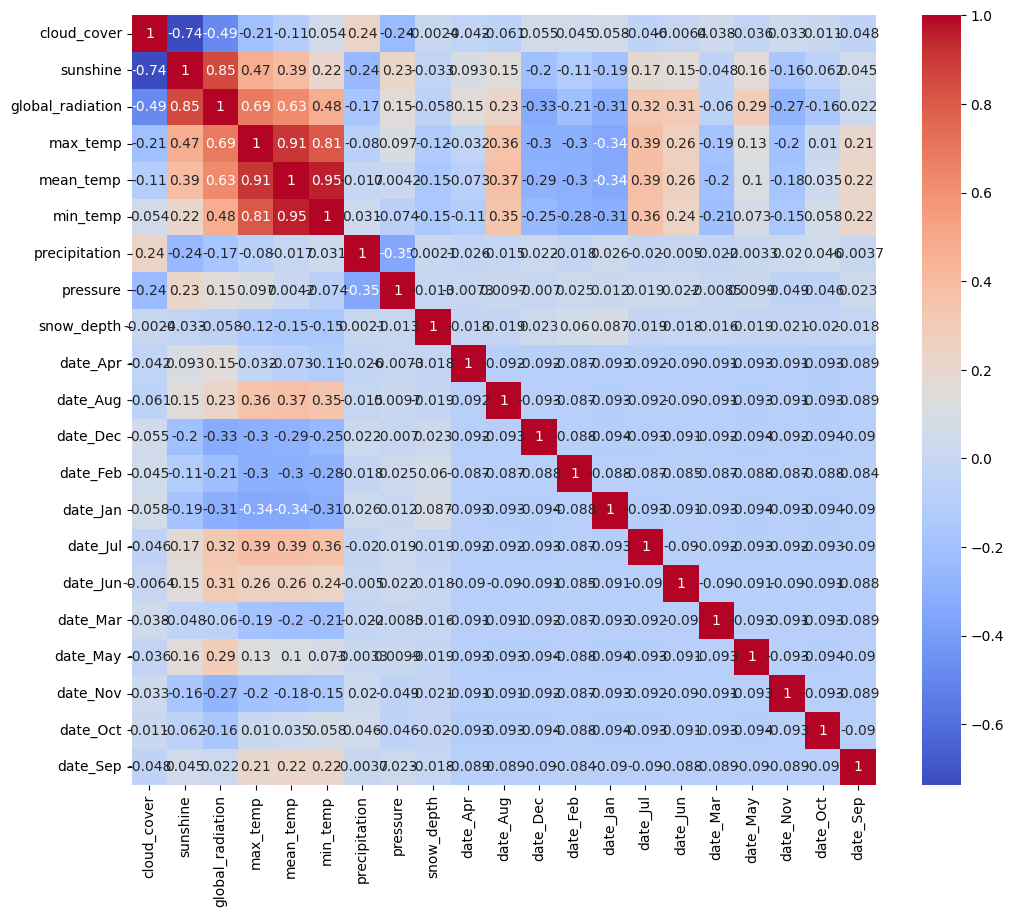

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(c, annot=True, cmap='coolwarm')
plt.show()

Defining Fucntion to find corelation for Given Element with certain threshold, this way we can build model with only highly corelated features and save some time in intial model.

In [16]:
def correlation(dataset, col_name ,threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    i = corr_matrix.columns.get_loc(col_name)
    for j in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[j]  # getting the name of column
            col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(lm_train, "mean_temp" ,0.6)
print("Number of Correalteed features : ", len(set(corr_features)), "\n Those are given below: \n", corr_features)

Number of Correalteed features :  4 
 Those are given below: 
 {'mean_temp', 'min_temp', 'global_radiation', 'max_temp'}


### Data sepration

separating target avriable from features.

axis=1 , means it will remove collom.

In [18]:
x_train_lm = lm_train.drop(columns=['mean_temp','min_temp', 'max_temp'], axis=1)
y_train_lm = lm_train['mean_temp']

x_test_lm = lm_test.drop(columns=['mean_temp', 'min_temp', 'max_temp'], axis=1)
y_test_lm = lm_test['mean_temp']

In [19]:
a = ['global_radiation', 'date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']


### Basic Linear model

In [20]:
# creating instance of model
lm_1  = LinearRegression()

# fitting a model
lm_1.fit(x_train_lm[a], y_train_lm)

# testing model
lm_1_prediction = lm_1.predict(x_test_lm[a])

# Calculate R-squared (Coefficient of determination)
lm_1_rsquare = r2_score(y_test_lm, lm_1_prediction)

# Calculate Mean Squared Error (MSE)
lm_1_mse = mean_squared_error(y_test_lm, lm_1_prediction)

print(f'R-squared: {lm_1_rsquare:.4f}')
print(f'Mean Squared Error: {lm_1_mse:.4f}')

R-squared: 0.7371
Mean Squared Error: 8.5950


### Multiple Regression

First we will check which combination of 2 features works best

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

lis = ['cloud_cover','sunshine', 'precipitation','pressure','snow_depth','precipitation']

# Create a Linear Regression model
lm = LinearRegression()

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=55)

# Initialize a dictionary to store MSE values for each variable
mse_dict = {}

# Loop over the predictor variables in 'lis'
for predictor in lis:

    a_temp = ['global_radiation', 'date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']
    a_temp.append(predictor)

    # Select the predictor variable from the DataFrame
    x_cv_val = x_train_lm[a_temp]
    
    # Perform cross-validation and calculate the MSE
    mse_scores = cross_val_score(lm, x_cv_val, y_train_lm, cv=k_fold, scoring='neg_mean_squared_error')
    
    # Storing MSE in dictionary, since we are getting negative MSE, we will multiplye it by -1 for MSE before storing it in dictionary
    mse_mean = mse_scores.mean()
    mse_dict[predictor] = -mse_mean

# Print the MSE values for each variable
for predictor, mse in mse_dict.items():
    print(f'{predictor}: Mean Squared Error = {mse:.4f}')

cloud_cover: Mean Squared Error = 8.7127
sunshine: Mean Squared Error = 8.7972
precipitation: Mean Squared Error = 8.9043
pressure: Mean Squared Error = 8.8797
snow_depth: Mean Squared Error = 8.6991


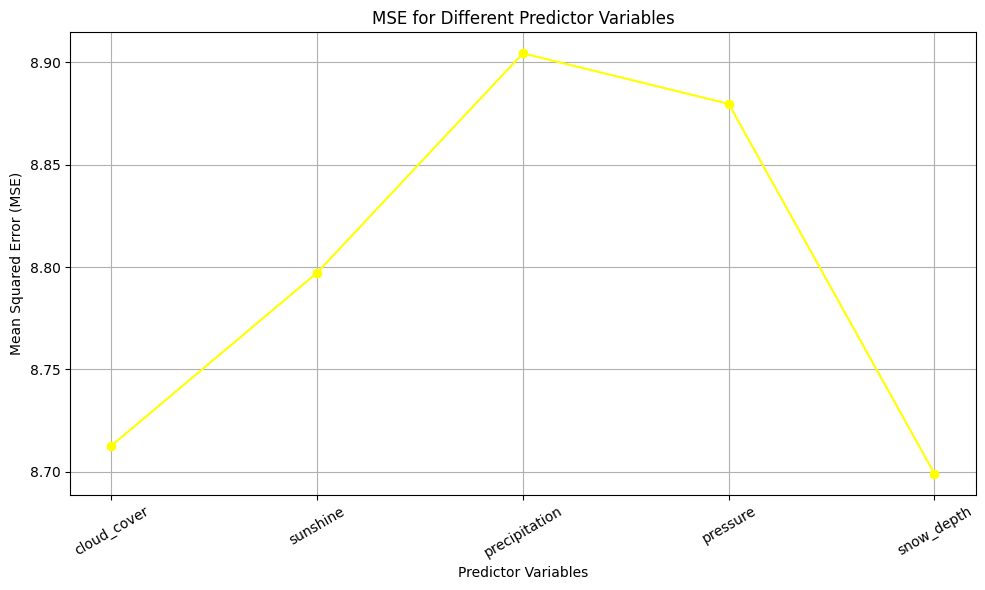

In [22]:
# Extract predictor variable names and corresponding MSE values
predictors = list(mse_dict.keys())
mse_values = list(mse_dict.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictors, mse_values, marker='o', linestyle='-', color = "yellow")
plt.xlabel('Predictor Variables')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Predictor Variables')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Creating model with sunshine and Gloable radition and evaluating it

In [23]:
a = ['global_radiation', 'date_Apr','date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun','date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep', 'snow_depth']

# creating instance of model
lm_2  = LinearRegression()

# Fitting a model
lm_2.fit(x_train_lm[a],y_train_lm)

# Testing a model
lm_2_prediction = lm_2.predict(x_test_lm[a])

# Calculate R-squared (Coefficient of determination)
lm_2_rsquare = r2_score(y_test_lm, lm_2_prediction)

# Calculate Mean Squared Error (MSE)
lm_2_mse = mean_squared_error(y_test_lm, lm_2_prediction)

print(f'R-squared: {lm_2_rsquare:.4f}')
print(f'Mean Squared Error: {lm_2_mse:.4f}')

R-squared: 0.7431
Mean Squared Error: 8.3990


In [24]:
lis = ['cloud_cover','precipitation','pressure','snow_depth','precipitation']

# Create a Linear Regression model
lm = LinearRegression()

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=55)

# Initialize a dictionary to store MSE values for each variable
mse_dict = {}

# Loop over the predictor variables in 'lis'
for predictor in lis:
    a_temp = ['global_radiation', 'date_Apr','date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun','date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep', 'snow_depth']
    a_temp.append(predictor)
    # Select the predictor variable from the DataFrame
    x_cv_val = x_train_lm[a_temp]
    
    # Perform cross-validation and calculate the MSE
    mse_scores = cross_val_score(lm, x_cv_val, y_train_lm, cv=k_fold, scoring='neg_mean_squared_error')
    
    # Calculate the mean MSE and store it in the dictionary
    mse_mean = -mse_scores.mean()
    mse_dict[predictor] = mse_mean

# Print the MSE values for each variable
for predictor, mse in mse_dict.items():
    print(f'{predictor}: Mean Squared Error = {mse:.4f}')


cloud_cover: Mean Squared Error = 8.4987
precipitation: Mean Squared Error = 8.6821
pressure: Mean Squared Error = 8.6541
snow_depth: Mean Squared Error = 8.6991


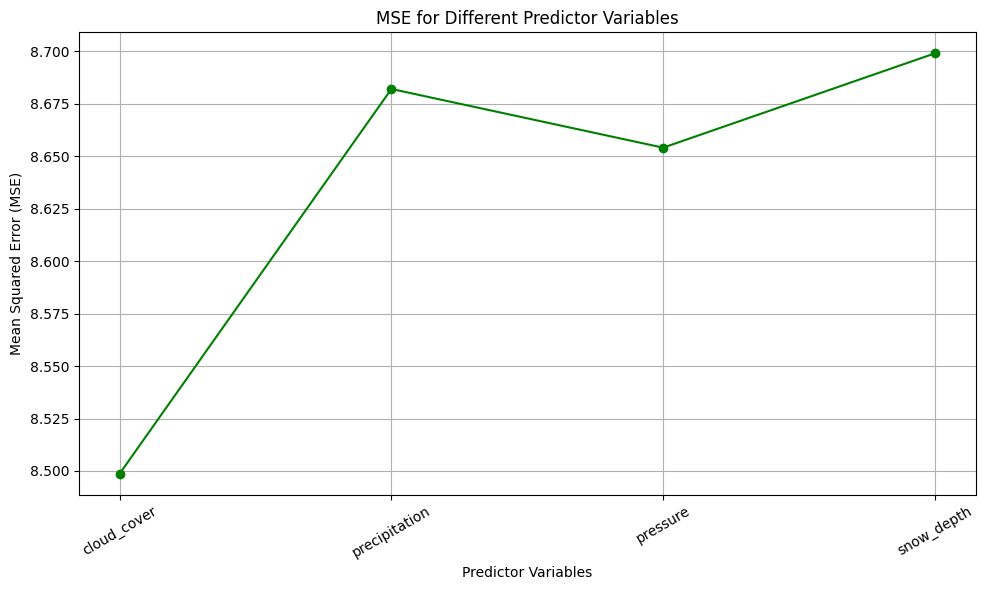

In [25]:
# Extract predictor variable names and corresponding MSE values
predictors = list(mse_dict.keys())
mse_values = list(mse_dict.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictors, mse_values, marker='o', linestyle='-', color = "green")
plt.xlabel('Predictor Variables')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Predictor Variables')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Model with all the features

In [26]:
a = ['global_radiation', 'snow_depth', 'cloud_cover', 'date_Apr','date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun','date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']

# creating instance of model
lm_3  = LinearRegression()

# fitting a model
lm_3.fit(x_train_lm[a], y_train_lm)

# testing model
lm_3_prediction = lm_3.predict(x_test_lm[a])

# Calculate R-squared (Coefficient of determination)
lm_3_rsquare = r2_score(y_test_lm, lm_3_prediction)

# Calculate Mean Squared Error (MSE)
lm_3_mse = mean_squared_error(y_test_lm, lm_3_prediction)

print(f'R-squared: {lm_3_rsquare:.4f}')
print(f'Mean Squared Error: {lm_3_mse:.4f}')

R-squared: 0.7488
Mean Squared Error: 8.2118


In [27]:
#### Model with every feature

In [28]:

# creating instance of model
lm_4  = LinearRegression()

# fitting a model
lm_4.fit(x_train_lm, y_train_lm)

# testing model
lm_4_prediction = lm_4.predict(x_test_lm)

# Calculate R-squared (Coefficient of determination)
lm_4_rsquare = r2_score(y_test_lm, lm_4_prediction)

# Calculate Mean Squared Error (MSE)
lm_4_mse = mean_squared_error(y_test_lm, lm_4_prediction)

print(f'R-squared: {lm_4_rsquare:.4f}')
print(f'Mean Squared Error: {lm_4_mse:.4f}')

R-squared: 0.7498
Mean Squared Error: 8.1809


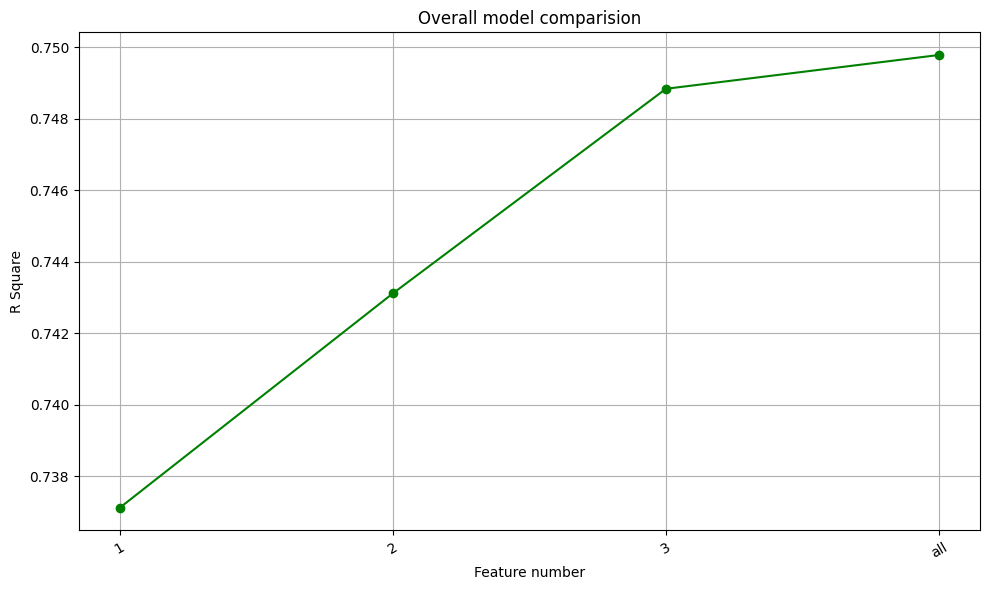

In [29]:
lm_model_feature = [  "1","2","3", "all"]
lm_model_rsquare = [lm_1_rsquare, lm_2_rsquare, lm_3_rsquare, lm_4_rsquare]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(lm_model_feature, lm_model_rsquare, marker='o', linestyle='-', color = "green")
plt.xlabel('Feature number')
plt.ylabel('R Square')
plt.title('Overall model comparision')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Since, there is barely any grwth we will stop here and won't add any more features.

### Linear Regression using Linear Algebra

In [30]:
x_train_lm['ones'] = 1
data =  x_train_lm[['ones','global_radiation', 'snow_depth', 'cloud_cover']].to_numpy()
 
coef =np.linalg.pinv(data).dot(y_train_lm) 
print(coef)

[ 1.97288929  0.04829457 -1.07210584  0.71780088]


In [31]:
x_test_lm['ones'] = 1
lm_5_prediction = x_test_lm[['ones','global_radiation', 'snow_depth', 'cloud_cover']].dot(coef)
lm_5_mse = ((lm_5_prediction - y_test_lm) ** 2).mean()

print("Mean Squared Error (MSE):", lm_5_mse)

Mean Squared Error (MSE): 17.558993106311927


### Coefficient obtained by 2 different method:


In [32]:
print("Sk learn Linear model Intercept: ",lm_3.intercept_,"coefficient",lm_3.coef_)

print("LinearAlgebra Linear model Intercept: ",coef[0],"coefficient",coef[1:])

Sk learn Linear model Intercept:  7.874419063715118 coefficient [ 0.01723465 -0.84617736  0.29309047 -2.1018527   5.94193558 -3.82213639
 -4.93097594 -4.71730271  5.76904748  3.41792127 -3.6576169   0.54055927
 -2.10560552  1.39150381  4.27452276]
LinearAlgebra Linear model Intercept:  1.9728892944514125 coefficient [ 0.04829457 -1.07210584  0.71780088]


## Question 2

### Binary Logistic Regression

In [33]:
df_2 = df_post.copy()

# Define labels and bins aka range
bins = [-7.7,df_2["mean_temp"].mean(), 30]
labels = [0, 1]


# Use pd.cut() to encode labels for given range
df_2['mean_temp'] = pd.cut(df['mean_temp'], bins=bins, labels=labels, right=False)


In [34]:
lr_train_1, lr_test_1 = train_test_split(df_2, test_size=0.3, random_state=10)

x_train_lr_1 = lr_train_1.drop(columns=['mean_temp', "min_temp", "max_temp"], axis=1)
y_train_lr_1 = lr_train_1['mean_temp']

x_test_lr_1 = lr_test_1.drop(columns=['mean_temp','min_temp', 'max_temp'], axis=1)
y_test_lr_1 = lr_test_1['mean_temp']

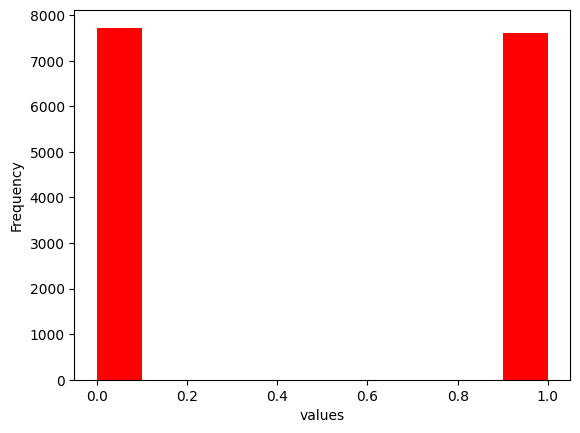

In [35]:
plt.hist(df_2['mean_temp'], color= "red")
plt.xlabel("values")
plt.ylabel("Frequency")
plt.show()

In [36]:
# create instance of logistic regression
lr_11 = LogisticRegression(solver = 'liblinear')

#fitting model
lr_11.fit(x_train_lr_1, y_train_lr_1)

# testing model
lr_11_prediction = lr_11.predict(x_test_lr_1)

# Calculate R-squared (Coefficient of determination)
lr_11_rsquare = r2_score(y_test_lr_1, lr_11_prediction)

# Calculate Mean Squared Error (MSE)
lr_11_mse = mean_squared_error(y_test_lr_1, lr_11_prediction)

# Calculate score
lr_11_score = lr_11.score(x_test_lr_1, y_test_lr_1) 

print(f'R-squared: {lr_11_rsquare:.4f}')
print(f'Mean Squared Error: {lr_11_mse:.4f}')
print(f'Score: {lr_11_score:.4f}')

R-squared: 0.5437
Mean Squared Error: 0.1141
Score: 0.8859


In [37]:
lis = ['global_radiation' ,'cloud_cover','sunshine', 'precipitation','pressure','snow_depth','precipitation']

# Create a Linear Regression model
lr = LogisticRegression(solver = 'liblinear')

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=55)

# Initialize a dictionary to store MSE values for each variable
accuracy_dict = {}

# Loop over the predictor variables in 'lis'
for predictor in lis:

    a_temp = ['date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']
    a_temp.append(predictor)

    # Select the predictor variable from the DataFrame
    x_cv_val = x_train_lr_1[a_temp]
    
    # Perform cross-validation and calculate the MSE
    accuracy_scores = cross_val_score(lr, x_cv_val, y_train_lr_1, cv=k_fold, scoring='accuracy')
    
    # Storing MSE in dictionary, since we are getting negative MSE, we will multiplye it by -1 for MSE before storing it in dictionary
    accuracy_mean = accuracy_scores.mean()
    accuracy_dict[predictor] = accuracy_mean

# Print the MSE values for each variable
for predictor, accuracy in accuracy_dict.items():
    print(f'{predictor}: accuracy = {accuracy:.4f}')

global_radiation: accuracy = 0.8801
cloud_cover: accuracy = 0.8797
sunshine: accuracy = 0.8797
precipitation: accuracy = 0.8795
pressure: accuracy = 0.8797
snow_depth: accuracy = 0.8797


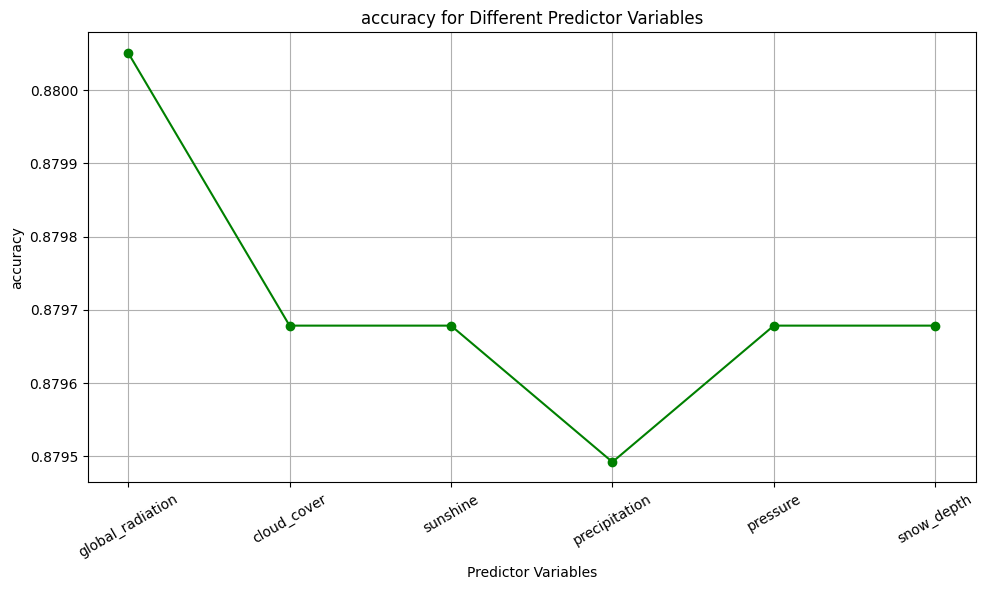

In [38]:
# Extract predictor variable names and corresponding MSE values
predictors = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictors, accuracy_values, marker='o', linestyle='-', color = "green")
plt.xlabel('Predictor Variables')
plt.ylabel('accuracy')
plt.title('accuracy for Different Predictor Variables')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
a2 = ['global_radiation', 'date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']

# create instance of logistic regression
lr_12 = LogisticRegression(solver = 'liblinear')

#fitting model
lr_12.fit(x_train_lr_1[a2], y_train_lr_1)

# testing model
lr_12_prediction = lr_12.predict(x_test_lr_1[a2])

# Calculate R-squared (Coefficient of determination)
lr_12_rsquare = r2_score(y_test_lr_1, lr_12_prediction)

# Calculate Mean Squared Error (MSE)
lr_12_mse = mean_squared_error(y_test_lr_1, lr_12_prediction)

# Calculate score
lr_12_score = lr_12.score(x_test_lr_1[a2], y_test_lr_1) 

print(f'R-squared: {lr_12_rsquare:.4f}')
print(f'Mean Squared Error: {lr_12_mse:.4f}')
print(f'Score: {lr_12_score:.4f}')


R-squared: 0.5611
Mean Squared Error: 0.1097
Score: 0.8903


In [40]:
lis = ['cloud_cover','sunshine', 'precipitation','pressure','snow_depth','precipitation']

# Create a Linear Regression model
lr = LogisticRegression(solver = 'liblinear')

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=55)

# Initialize a dictionary to store MSE values for each variable
accuracy_dict = {}

# Loop over the predictor variables in 'lis'
for predictor in lis:

    a_temp = ['global_radiation', 'date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']
    a_temp.append(predictor)

    # Select the predictor variable from the DataFrame
    x_cv_val = x_train_lr_1[a_temp]
    
    # Perform cross-validation and calculate the MSE
    accuracy_scores = cross_val_score(lr, x_cv_val, y_train_lr_1, cv=k_fold, scoring='accuracy')
    
    # Storing MSE in dictionary, since we are getting negative MSE, we will multiplye it by -1 for MSE before storing it in dictionary
    accuracy_mean = accuracy_scores.mean()
    accuracy_dict[predictor] = accuracy_mean

# Print the MSE values for each variable
for predictor, accuracy in accuracy_dict.items():
    print(f'{predictor}: accuracy = {accuracy:.4f}')

cloud_cover: accuracy = 0.8839
sunshine: accuracy = 0.8842
precipitation: accuracy = 0.8801
pressure: accuracy = 0.8777
snow_depth: accuracy = 0.8801


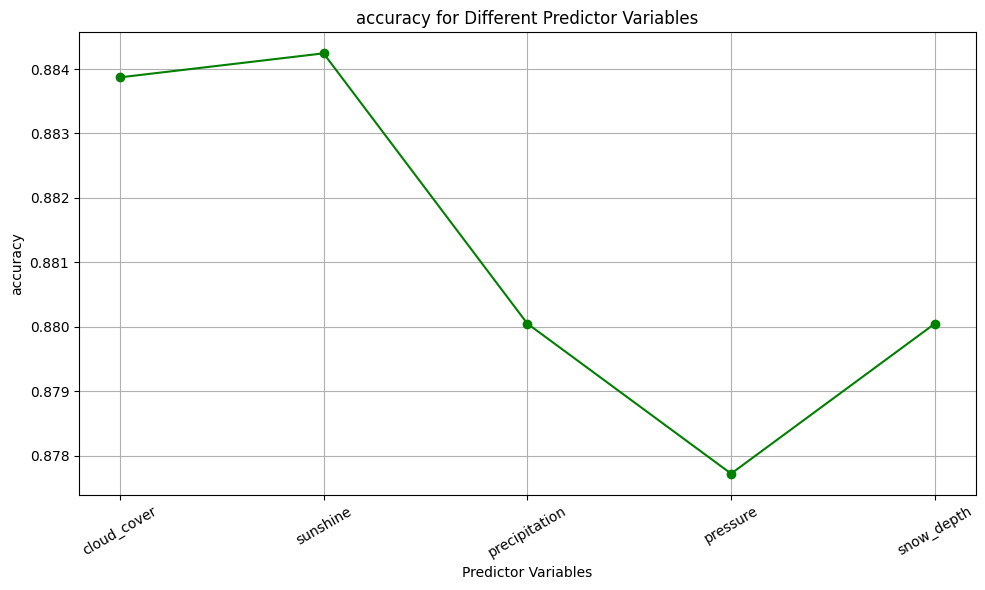

In [41]:
# Extract predictor variable names and corresponding MSE values
predictors = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictors, accuracy_values, marker='o', linestyle='-', color = "green")
plt.xlabel('Predictor Variables')
plt.ylabel('accuracy')
plt.title('accuracy for Different Predictor Variables')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [42]:

a3 = ['global_radiation', 'sunshine', 'date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']

# create instance of logistic regression
lr_13 = LogisticRegression(solver = 'liblinear')

#fitting model
lr_13.fit(x_train_lr_1[a3], y_train_lr_1)

# testing model
lr_13_prediction = lr_13.predict(x_test_lr_1[a3])

# Calculate R-squared (Coefficient of determination)
lr_13_rsquare = r2_score(y_test_lr_1, lr_13_prediction)

# Calculate Mean Squared Error (MSE)
lr_13_mse = mean_squared_error(y_test_lr_1, lr_13_prediction)

# Calculate score
lr_13_score = lr_13.score(x_test_lr_1[a3], y_test_lr_1) 

print(f'R-squared: {lr_13_rsquare:.4f}')
print(f'Mean Squared Error: {lr_13_mse:.4f}')
print(f'Score: {lr_13_score:.4f}')

R-squared: 0.5515
Mean Squared Error: 0.1121
Score: 0.8879


In [43]:
lis = ['cloud_cover', 'precipitation','pressure','snow_depth','precipitation']

# Create a Linear Regression model
lr = LogisticRegression(solver = 'liblinear')

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=55)

# Initialize a dictionary to store MSE values for each variable
accuracy_dict = {}

# Loop over the predictor variables in 'lis'
for predictor in lis:

    a_temp = ['global_radiation', 'sunshine','date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']
    a_temp.append(predictor)

    # Select the predictor variable from the DataFrame
    x_cv_val = x_train_lr_1[a_temp]
    
    # Perform cross-validation and calculate the MSE
    accuracy_scores = cross_val_score(lr, x_cv_val, y_train_lr_1, cv=k_fold, scoring='accuracy')
    
    # Storing MSE in dictionary, since we are getting negative MSE, we will multiplye it by -1 for MSE before storing it in dictionary
    accuracy_mean = accuracy_scores.mean()
    accuracy_dict[predictor] = accuracy_mean

# Print the MSE values for each variable
for predictor, accuracy in accuracy_dict.items():
    print(f'{predictor}: accuracy = {accuracy:.4f}')

cloud_cover: accuracy = 0.8861
precipitation: accuracy = 0.8843
pressure: accuracy = 0.8857
snow_depth: accuracy = 0.8842


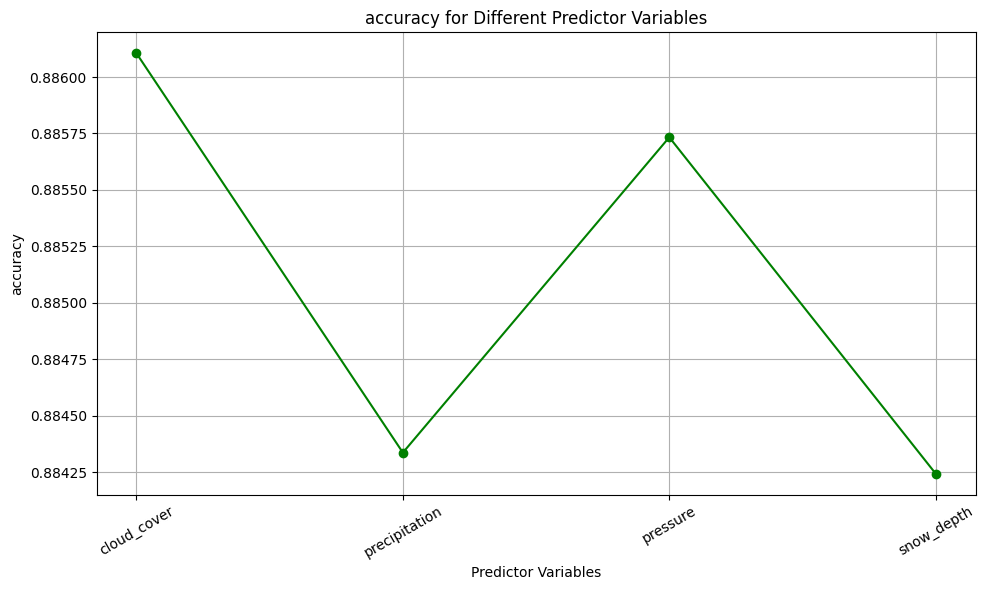

In [44]:
# Extract predictor variable names and corresponding MSE values
predictors = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictors, accuracy_values, marker='o', linestyle='-', color = "green")
plt.xlabel('Predictor Variables')
plt.ylabel('accuracy')
plt.title('accuracy for Different Predictor Variables')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [45]:
a4 = ['global_radiation', 'sunshine', 'cloud_cover','date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']

# create instance of logistic regression
lr_14 = LogisticRegression(solver = 'liblinear')

#fitting model
lr_14.fit(x_train_lr_1[a4], y_train_lr_1)

# testing model
lr_14_prediction = lr_14.predict(x_test_lr_1[a4])

# Calculate R-squared (Coefficient of determination)
lr_14_rsquare = r2_score(y_test_lr_1, lr_14_prediction)

# Calculate Mean Squared Error (MSE)
lr_14_mse = mean_squared_error(y_test_lr_1, lr_14_prediction)

# Calculate score
lr_14_score = lr_14.score(x_test_lr_1[a4], y_test_lr_1) 

print(f'R-squared: {lr_14_rsquare:.4f}')
print(f'Mean Squared Error: {lr_14_mse:.4f}')
print(f'Score: {lr_14_score:.4f}')

R-squared: 0.5481
Mean Squared Error: 0.1130
Score: 0.8870


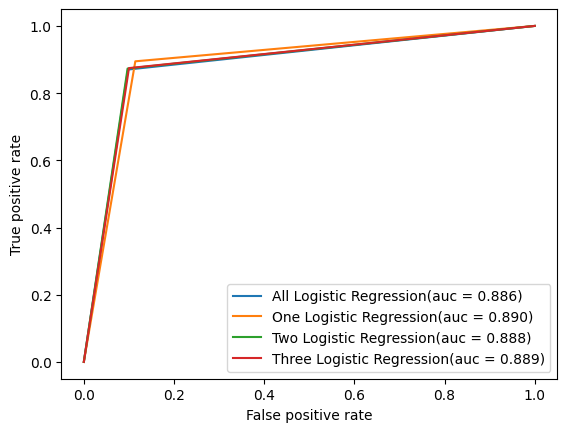

In [46]:
lr_11.decision_function(x_test_lr_1)
lr_12.decision_function(x_test_lr_1[a2])
lr_13.decision_function(x_test_lr_1[a3])
lr_14.decision_function(x_test_lr_1[a4])

lr_11_fpr, lr_11_tpr, threshold = roc_curve(y_test_lr_1, lr_11_prediction)
lr_12_fpr, lr_12_tpr, threshold = roc_curve(y_test_lr_1, lr_12_prediction)
lr_13_fpr, lr_13_tpr, threshold = roc_curve(y_test_lr_1, lr_13_prediction)
lr_14_fpr, lr_14_tpr, threshold = roc_curve(y_test_lr_1, lr_14_prediction)

auc_lr_11 = auc(lr_11_fpr, lr_11_tpr)
auc_lr_12 = auc(lr_12_fpr, lr_12_tpr)
auc_lr_13 = auc(lr_13_fpr, lr_13_tpr)
auc_lr_14 = auc(lr_13_fpr, lr_14_tpr)

plt.plot(lr_11_fpr, lr_11_tpr, linestyle = "-", label = 'All Logistic Regression(auc = %0.3f)' % auc_lr_11)
plt.plot(lr_12_fpr, lr_12_tpr, linestyle = "-", label = 'One Logistic Regression(auc = %0.3f)' % auc_lr_12)
plt.plot(lr_13_fpr, lr_13_tpr, linestyle = "-", label = 'Two Logistic Regression(auc = %0.3f)' % auc_lr_13)
plt.plot(lr_14_fpr, lr_14_tpr, linestyle = "-", label = 'Three Logistic Regression(auc = %0.3f)' % auc_lr_14)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

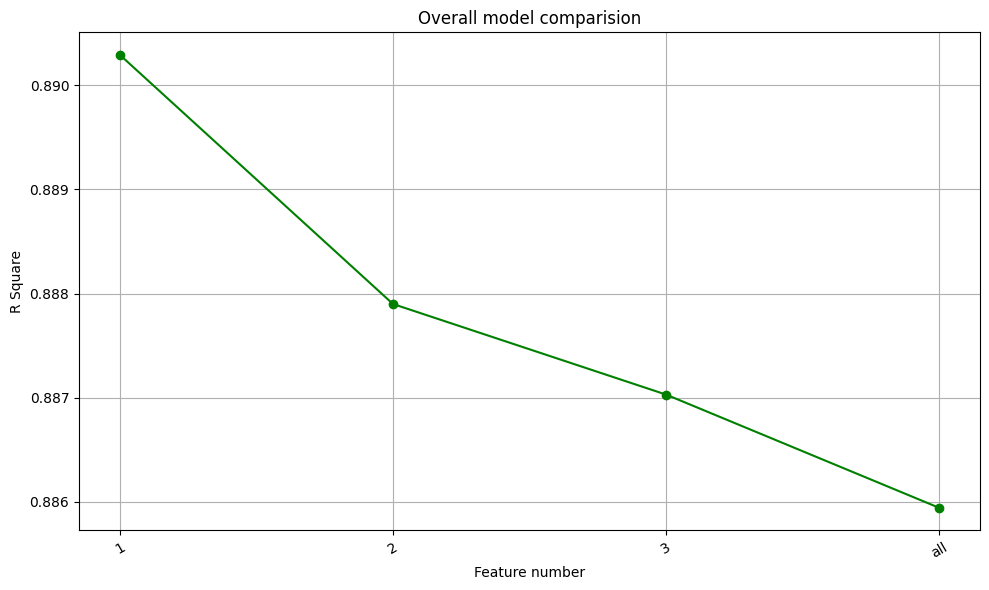

In [47]:
lr_model_feature = [  "1","2","3", "all"]
lr_model_rsquare = [lr_12_score, lr_13_score, lr_14_score, lr_11_score]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(lr_model_feature, lr_model_rsquare, marker='o', linestyle='-', color = "green")
plt.xlabel('Feature number')
plt.ylabel('R Square')
plt.title('Overall model comparision')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Multiclass Logistic regression

In [48]:
df_3 = df_post.copy()
sd = df["mean_temp"].std()
m = df["mean_temp"].mean()

upper = 1*sd + m
lower = -1*sd + m

# Define the bin edges and labels
bins = [-7.7, lower, upper, 30]
labels = [0, 1, 2]

# Use pd.cut() to encode the values into bins
df_3['mean_temp'] = pd.cut(df_3['mean_temp'], bins=bins, labels=labels, right=False)

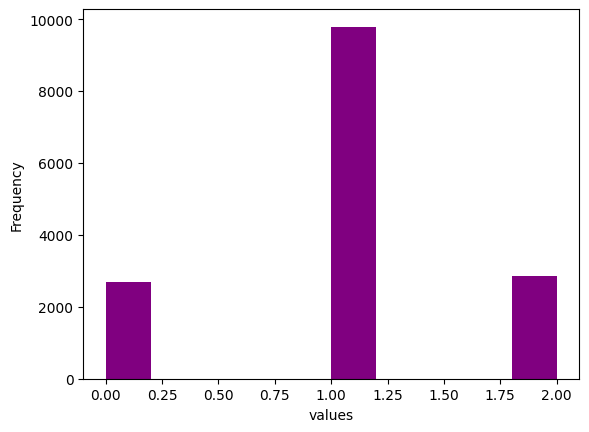

In [49]:
plt.hist(df_3['mean_temp'], color= "purple")
plt.xlabel("values")
plt.ylabel("Frequency")
plt.show()

### Split data

In [50]:
lr_train_2, lr_test_2 = train_test_split(df_3, test_size=0.3, random_state=10)

x_train_lr_2 = lr_train_2.drop(columns=['mean_temp', "min_temp", "max_temp"], axis=1)
y_train_lr_2 = lr_train_2['mean_temp']

x_test_lr_2 = lr_test_2.drop(columns=['mean_temp', "min_temp", "max_temp"], axis=1)
y_test_lr_2 = lr_test_2['mean_temp']

In [51]:
# create instance of logistic regression
lr_21 = LogisticRegression()

#fitting model
lr_21.fit(x_train_lr_2, y_train_lr_2)

# testing model
lr_21_prediction = lr_21.predict(x_test_lr_2)

# Calculate R-squared (Coefficient of determination)
lr_21_rsquare = r2_score(y_test_lr_2, lr_21_prediction)

# Calculate Mean Squared Error (MSE)
lr_21_mse = mean_squared_error(y_test_lr_2, lr_21_prediction)

# Calculate score
lr_21_score = lr_21.score(x_test_lr_2, y_test_lr_2) 

print(f'R-squared: {lr_21_rsquare:.4f}')
print(f'Mean Squared Error: {lr_21_mse:.4f}')
print(f'Score: {lr_21_score:.4f}')

R-squared: 0.0195
Mean Squared Error: 0.3463
Score: 0.6544


In [52]:
lis = ['global_radiation' ,'cloud_cover','sunshine', 'precipitation','pressure','snow_depth','precipitation']

# Create a Linear Regression model
lr = LogisticRegression()

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=55)

# Initialize a dictionary to store MSE values for each variable
accuracy_dict = {}

# Loop over the predictor variables in 'lis'
for predictor in lis:

    a_temp = ['date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']
    a_temp.append(predictor)

    # Select the predictor variable from the DataFrame
    x_cv_val = x_train_lr_2[a_temp]
    
    # Perform cross-validation and calculate the MSE
    accuracy_scores = cross_val_score(lr, x_cv_val, y_train_lr_2, cv=k_fold, scoring='accuracy')
    
    # Storing MSE in dictionary, since we are getting negative MSE, we will multiplye it by -1 for MSE before storing it in dictionary
    accuracy_mean = accuracy_scores.mean()
    accuracy_dict[predictor] = accuracy_mean

# Print the MSE values for each variable
for predictor, accuracy in accuracy_dict.items():
    print(f'{predictor}: accuracy = {accuracy:.4f}')

global_radiation: accuracy = 0.7026
cloud_cover: accuracy = 0.7263
sunshine: accuracy = 0.7222
precipitation: accuracy = 0.7170
pressure: accuracy = 0.6346
snow_depth: accuracy = 0.7086


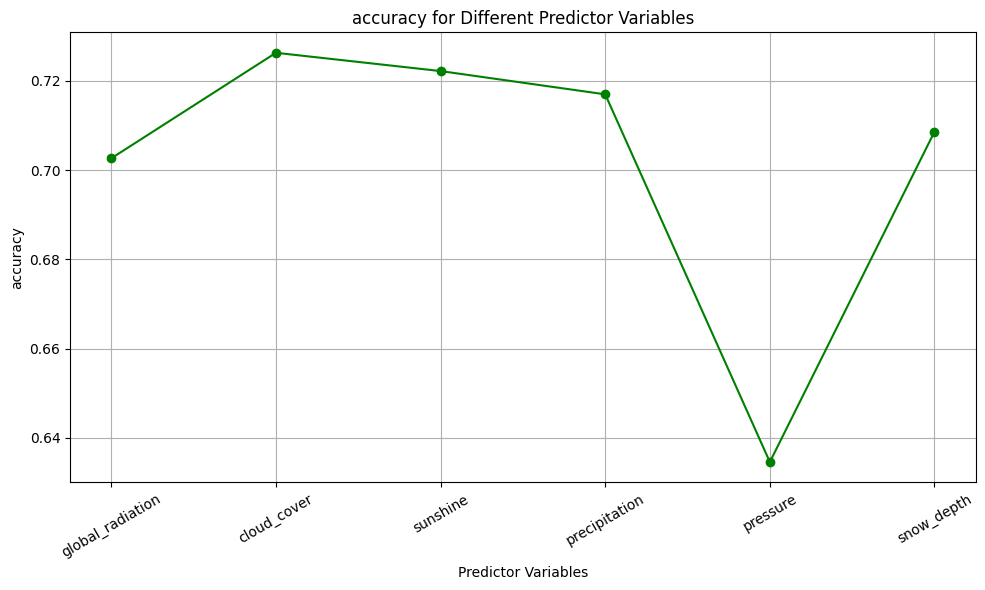

In [53]:
# Extract predictor variable names and corresponding MSE values
predictors = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictors, accuracy_values, marker='o', linestyle='-', color = "green")
plt.xlabel('Predictor Variables')
plt.ylabel('accuracy')
plt.title('accuracy for Different Predictor Variables')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [57]:
a22 = ['cloud_cover', 'date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']

# create instance of logistic regression
lr_22 = LogisticRegression(solver = 'liblinear')

#fitting model
lr_22.fit(x_train_lr_2[a22], y_train_lr_2)

# testing model
lr_22_prediction = lr_22.predict(x_test_lr_2[a22])

# Calculate R-squared (Coefficient of determination)
lr_22_rsquare = r2_score(y_test_lr_2, lr_22_prediction)

# Calculate Mean Squared Error (MSE)
lr_22_mse = mean_squared_error(y_test_lr_2, lr_22_prediction)

# Calculate score
lr_22_score = lr_22.score(x_test_lr_2[a22], y_test_lr_2) 

print(f'R-squared: {lr_22_rsquare:.4f}')
print(f'Mean Squared Error: {lr_22_mse:.4f}')
print(f'Score: {lr_22_score:.4f}')

R-squared: 0.2323
Mean Squared Error: 0.2711
Score: 0.7289


In [59]:
lis = ['global_radiation','sunshine', 'precipitation','pressure','snow_depth','precipitation']

# Create a Linear Regression model
lr = LogisticRegression()

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=55)

# Initialize a dictionary to store MSE values for each variable
accuracy_dict = {}

# Loop over the predictor variables in 'lis'
for predictor in lis:

    a_temp = ['cloud_cover','date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']
    a_temp.append(predictor)

    # Select the predictor variable from the DataFrame
    x_cv_val = x_train_lr_2[a_temp]
    
    # Perform cross-validation and calculate the MSE
    accuracy_scores = cross_val_score(lr, x_cv_val, y_train_lr_2, cv=k_fold, scoring='accuracy')
    
    # Storing MSE in dictionary, since we are getting negative MSE, we will multiplye it by -1 for MSE before storing it in dictionary
    accuracy_mean = accuracy_scores.mean()
    accuracy_dict[predictor] = accuracy_mean

# Print the MSE values for each variable
for predictor, accuracy in accuracy_dict.items():
    print(f'{predictor}: accuracy = {accuracy:.4f}')

global_radiation: accuracy = 0.7254
sunshine: accuracy = 0.7275
precipitation: accuracy = 0.7293
pressure: accuracy = 0.6346
snow_depth: accuracy = 0.7329


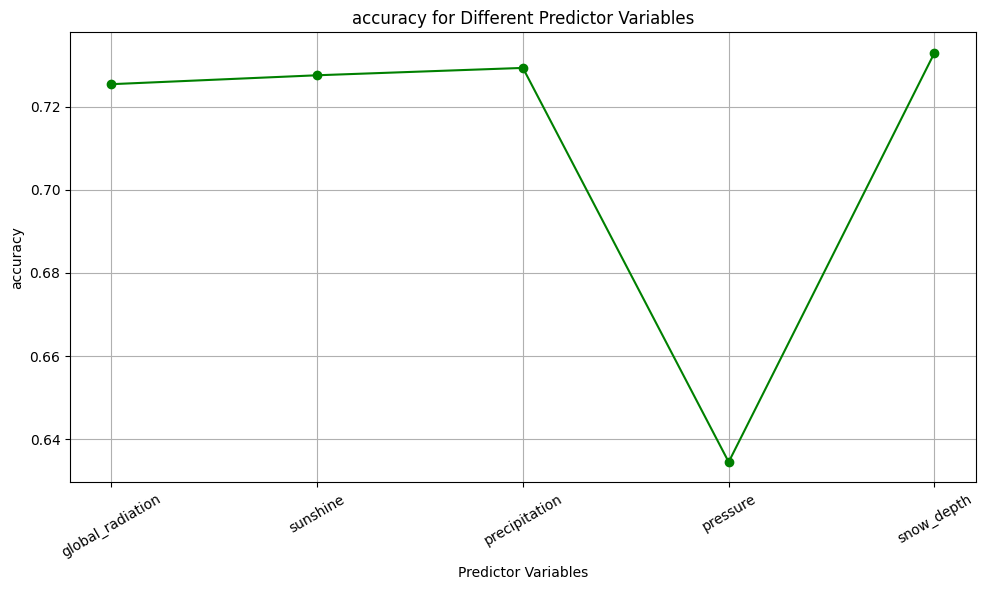

In [60]:
# Extract predictor variable names and corresponding MSE values
predictors = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictors, accuracy_values, marker='o', linestyle='-', color = "green")
plt.xlabel('Predictor Variables')
plt.ylabel('accuracy')
plt.title('accuracy for Different Predictor Variables')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [64]:
a23 = ['cloud_cover', 'snow_depth', 'date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']

# create instance of logistic regression
lr_23 = LogisticRegression()

#fitting model
lr_23.fit(x_train_lr_2[a23], y_train_lr_2)

# testing model
lr_23_prediction = lr_23.predict(x_test_lr_2[a23])

# Calculate R-squared (Coefficient of determination)
lr_23_rsquare = r2_score(y_test_lr_2, lr_23_prediction)

# Calculate Mean Squared Error (MSE)
lr_23_mse = mean_squared_error(y_test_lr_2, lr_23_prediction)

# Calculate score
lr_23_score = lr_23.score(x_test_lr_2[a23], y_test_lr_2) 

print(f'R-squared: {lr_23_rsquare:.4f}')
print(f'Mean Squared Error: {lr_23_mse:.4f}')
print(f'Score: {lr_23_score:.4f}')

R-squared: 0.2403
Mean Squared Error: 0.2683
Score: 0.7317


In [62]:
lis = ['global_radiation','sunshine', 'precipitation','pressure','precipitation']

# Create a Linear Regression model
lr = LogisticRegression()

# Define the number of folds for cross-validation
k_fold = KFold(n_splits=10, shuffle=True, random_state=55)

# Initialize a dictionary to store MSE values for each variable
accuracy_dict = {}

# Loop over the predictor variables in 'lis'
for predictor in lis:

    a_temp = ['cloud_cover', 'snow_depth', 'date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']
    a_temp.append(predictor)

    # Select the predictor variable from the DataFrame
    x_cv_val = x_train_lr_2[a_temp]
    
    # Perform cross-validation and calculate the MSE
    accuracy_scores = cross_val_score(lr, x_cv_val, y_train_lr_2, cv=k_fold, scoring='accuracy')
    
    # Storing MSE in dictionary, since we are getting negative MSE, we will multiplye it by -1 for MSE before storing it in dictionary
    accuracy_mean = accuracy_scores.mean()
    accuracy_dict[predictor] = accuracy_mean

# Print the MSE values for each variable
for predictor, accuracy in accuracy_dict.items():
    print(f'{predictor}: accuracy = {accuracy:.4f}')

global_radiation: accuracy = 0.7300
sunshine: accuracy = 0.7342
precipitation: accuracy = 0.7347
pressure: accuracy = 0.6346


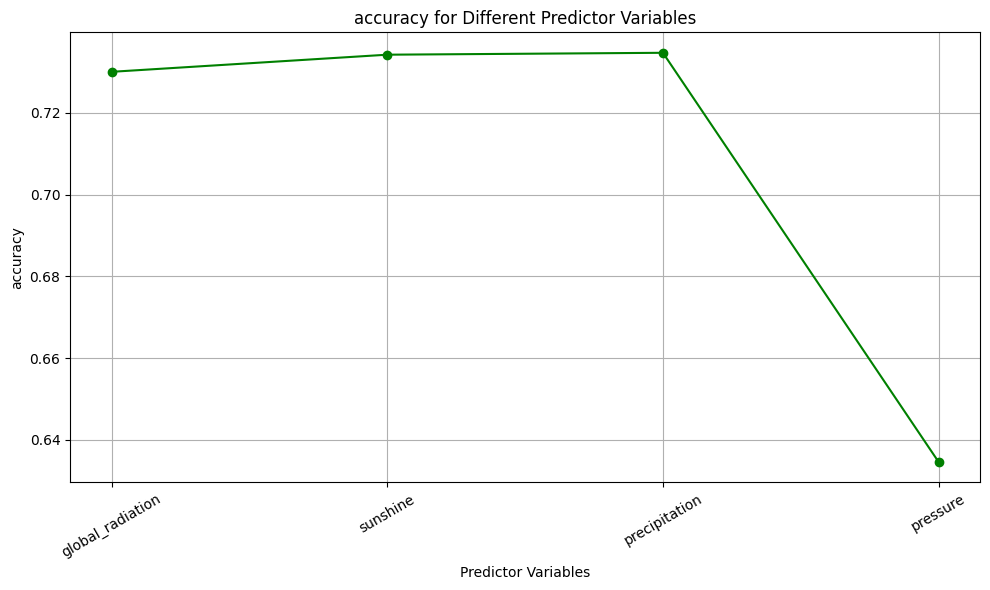

In [63]:
# Extract predictor variable names and corresponding MSE values
predictors = list(accuracy_dict.keys())
accuracy_values = list(accuracy_dict.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(predictors, accuracy_values, marker='o', linestyle='-', color = "green")
plt.xlabel('Predictor Variables')
plt.ylabel('accuracy')
plt.title('accuracy for Different Predictor Variables')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [69]:
a24 = ['cloud_cover', 'snow_depth', 'precipitation' ,'date_Apr',
       'date_Aug', 'date_Dec', 'date_Feb', 'date_Jan', 'date_Jul', 'date_Jun',
       'date_Mar', 'date_May', 'date_Nov', 'date_Oct', 'date_Sep']

# create instance of logistic regression
lr_24 = LogisticRegression()

#fitting model
lr_24.fit(x_train_lr_2[a24], y_train_lr_2)

# testing model
lr_24_prediction = lr_24.predict(x_test_lr_2[a24])

# Calculate R-squared (Coefficient of determination)
lr_24_rsquare = r2_score(y_test_lr_2, lr_24_prediction)

# Calculate Mean Squared Error (MSE)
lr_24_mse = mean_squared_error(y_test_lr_2, lr_24_prediction)

# Calculate score
lr_24_score = lr_24.score(x_test_lr_2[a24], y_test_lr_2) 

print(f'R-squared: {lr_24_rsquare:.4f}')
print(f'Mean Squared Error: {lr_24_mse:.4f}')
print(f'Score: {lr_24_score:.4f}')

R-squared: 0.2668
Mean Squared Error: 0.2590
Score: 0.7410


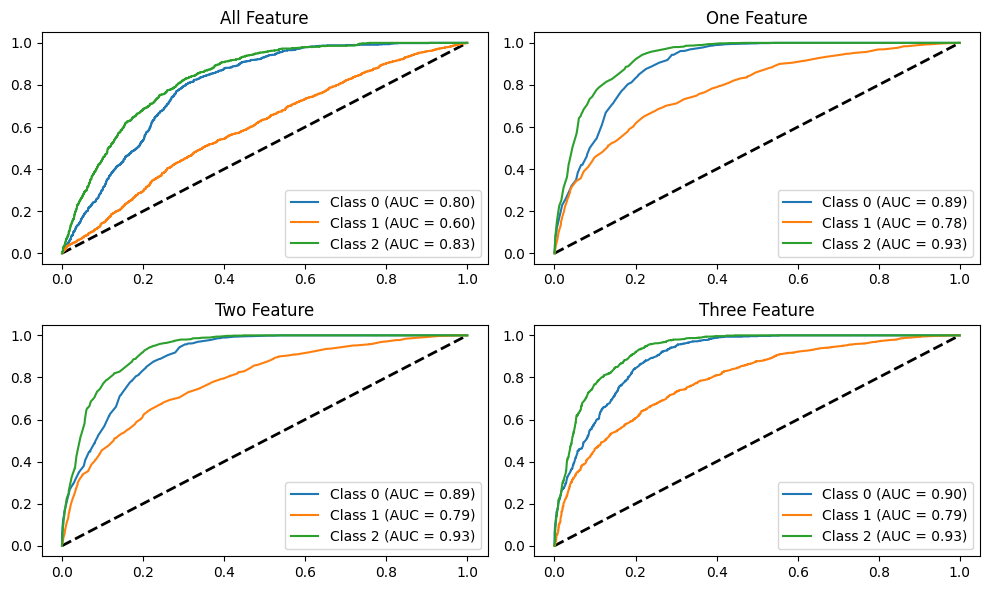

In [92]:
lr_21_prob = lr_21.predict_proba(x_test_lr_2)
lr_22_prob = lr_22.predict_proba(x_test_lr_2[a22])
lr_23_prob = lr_23.predict_proba(x_test_lr_2[a23])
lr_24_prob = lr_24.predict_proba(x_test_lr_2[a24])

# Initialize dictionaries to store ROC curve data and AUC scores
roc_curves_1 = {}
auc_scores_1 = {}

roc_curves_2 = {}
auc_scores_2 = {}

roc_curves_3 = {}
auc_scores_3 = {}

roc_curves_4 = {}
auc_scores_4 = {}

# Compute ROC curve and AUC for each class
for i in range(lr_21.classes_.shape[0]):
    fpr, tpr, _ = roc_curve(y_test_lr_2 == lr_21.classes_[i], lr_21_prob[:, i])
    roc_curves_1[i] = (fpr, tpr)
    auc_scores_1[i] = auc(fpr, tpr)

# # Plot ROC curves for each class
# plt.figure(figsize=(8, 6))
# plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line
# for i in range(lr_21.classes_.shape[0]):
#     plt.plot(roc_curves_1[i][0], roc_curves_1[i][1], label=f'Class {i} (AUC = {auc_scores_1[i]:.2f})')



# Compute ROC curve and AUC for each class
for i in range(lr_22.classes_.shape[0]):
    fpr, tpr, _ = roc_curve(y_test_lr_2 == lr_22.classes_[i], lr_22_prob[:, i])
    roc_curves_2[i] = (fpr, tpr)
    auc_scores_2[i] = auc(fpr, tpr)

# # Plot ROC curves for each class
# plt.figure(figsize=(8, 6))
# plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line
# for i in range(lr_22.classes_.shape[0]):
#     plt.plot(roc_curves_2[i][0], roc_curves_2[i][1], label=f'Class {i} (AUC = {auc_scores_2[i]:.2f})')

# Compute ROC curve and AUC for each class
for i in range(lr_23.classes_.shape[0]):
    fpr, tpr, _ = roc_curve(y_test_lr_2 == lr_23.classes_[i], lr_23_prob[:, i])
    roc_curves_3[i] = (fpr, tpr)
    auc_scores_3[i] = auc(fpr, tpr)

# # Plot ROC curves for each class
# plt.figure(figsize=(8, 6))
# plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line
# for i in range(lr_23.classes_.shape[0]):
#     plt.plot(roc_curves_3[i][0], roc_curves_3[i][1], label=f'Class {i} (AUC = {auc_scores_3[i]:.2f})')




# Compute ROC curve and AUC for each class
for i in range(lr_24.classes_.shape[0]):
    fpr, tpr, _ = roc_curve(y_test_lr_2 == lr_24.classes_[i], lr_24_prob[:, i])
    roc_curves_4[i] = (fpr, tpr)
    auc_scores_4[i] = auc(fpr, tpr)

# # Plot ROC curves for each class
# plt.figure(figsize=(8, 6))
# plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line
# for i in range(lr_24.classes_.shape[0]):
#     plt.plot(roc_curves_4[i][0], roc_curves_4[i][1], label=f'Class {i} (AUC = {auc_scores_4[i]:.2f})')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for Multi-Class Logistic Regression')
# plt.legend(loc='best')
# plt.show()



# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Plot data in each subplot
axes[0, 0].plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line
for i in range(lr_21.classes_.shape[0]):
    axes[0,0].plot(roc_curves_1[i][0], roc_curves_1[i][1], label=f'Class {i} (AUC = {auc_scores_1[i]:.2f})')
axes[0, 0].set_title('All Feature')
axes[0,0].legend()

axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line
for i in range(lr_22.classes_.shape[0]):
    axes[0,1].plot(roc_curves_2[i][0], roc_curves_2[i][1], label=f'Class {i} (AUC = {auc_scores_2[i]:.2f})')
axes[0, 1].set_title('One Feature')
axes[0,1].legend()

axes[1, 0].plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line
for i in range(lr_23.classes_.shape[0]):
    axes[1,0].plot(roc_curves_3[i][0], roc_curves_3[i][1], label=f'Class {i} (AUC = {auc_scores_3[i]:.2f})')
axes[1, 0].set_title('Two Feature')
axes[1,0].legend()

axes[1, 1].plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line
for i in range(lr_24.classes_.shape[0]):
    axes[1,1].plot(roc_curves_4[i][0], roc_curves_4[i][1], label=f'Class {i} (AUC = {auc_scores_4[i]:.2f})')
axes[1, 1].set_title('Three Feature')
axes[1,1].legend()

# Add spacing between subplots
plt.tight_layout()

# Show the plots
plt.legend()
plt.show()